In [144]:
import os
import numpy as np
import glob
import json
import pandas as pd

In [400]:
PATH = '/home/anneke/Documents/models/weights'

w_dir = glob.glob1(PATH, 'int*')

In [401]:
from collections import defaultdict

data = defaultdict(list)

In [402]:
for w in w_dir:
    conf = glob.glob1(os.path.join(PATH, w), "CONF*")
    
    if conf:
        with open(os.path.join(PATH, '{}/CONFIG'.format(w))) as j:
            config = json.load(j)
            
            data['dataset'].append(config['args']['dataset'])
            data['train_mode'].append(config['args']['train_mode'])
            data['word_len'].append(config['args']['word_len'])
            data['epochs'].append(config['args']['epochs'])
            data['batch_size'].append(config['args']['batch_size'])
            data['start_time'].append(config['start_time'])
            data['end_time'].append(config['end_time'])
            data['total_keyword'].append(config['data_summary']['keyword']['total'])
            data['x_train'].append(config['data_summary']['data']['train'])
            data['x_test'].append(config['data_summary']['data']['test'])
            data['loss'].append(config['report']['loss'])
            data['accuracy'].append(config['report']['acc'])
            data['total_accept'].append(config['report']['total_accept'])
            data['total_reject'].append(config['report']['total_reject'])
            data['rejection_rate'].append(config['report']['rejection_rate'])

In [403]:
[len(d) for d in data.values()]

[57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57]

In [404]:
pdf = pd.DataFrame(data)

In [405]:
# df.to_csv('./result.csv')

In [406]:
df = pdf[pdf['epochs'] == 1]

In [407]:
adf = pdf[pdf['epochs'] == 1000]

In [408]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="darkgrid")

In [409]:
pdf.head(2)

,dataset,train_mode,word_len,epochs,batch_size,start_time,end_time,total_keyword,x_train,x_test,loss,accuracy,total_accept,total_reject,rejection_rate
0,arxiv,3,200,1,1,19-08-27_21:59:10,19-08-27_22:02:03,126,18930,9466,0.140,0.958,8605,861,0.091
1,agnews,3,200,1,1,19-08-28_11:59:52,19-08-28_12:08:39,138,60000,3800,0.079,0.984,2834,966,0.254


In [410]:
df

,dataset,train_mode,word_len,epochs,batch_size,start_time,end_time,total_keyword,x_train,x_test,loss,accuracy,total_accept,total_reject,rejection_rate
0,arxiv,3,200,1,1,19-08-27_21:59:10,19-08-27_22:02:03,126,18930,9466,0.140,0.958,8605,861,0.091
1,agnews,3,200,1,1,19-08-28_11:59:52,19-08-28_12:08:39,138,60000,3800,0.079,0.984,2834,966,0.254
4,imdb,3,200,1,1,19-08-27_19:07:40,19-08-27_19:13:27,125,25000,25000,0.281,0.920,17476,7524,0.301
11,imdb,1,200,1,1,19-08-27_18:56:36,19-08-27_19:01:39,125,25000,25000,0.486,0.744,11968,13032,0.521
12,arxiv,2,100,1,1,19-08-27_21:56:24,19-08-27_21:59:05,71,18930,9466,0.148,0.946,7016,2450,0.259
13,arxiv,3,300,1,1,19-08-27_22:02:09,19-08-27_22:05:26,167,18930,9466,0.140,0.957,8894,572,0.060
16,arxiv,3,100,1,1,19-08-27_21:55:43,19-08-27_21:58:17,71,18930,9466,0.146,0.951,7016,2450,0.259
17,imdb,2,300,1,1,19-08-27_19:02:13,19-08-27_19:08:19,170,25000,25000,0.284,0.915,19393,5607,0.224
18,arxiv,2,200,1,1,19-08-27_21:59:10,19-08-27_22:02:00,126,18930,9466,0.138,0.960,8590,876,0.093
19,imdb,1,300,1,1,19-08-27_18:56:44,19-08-27_19:02:04,170,25000,25000,0.575,0.684,14023,10977,0.439


## 1 epoch

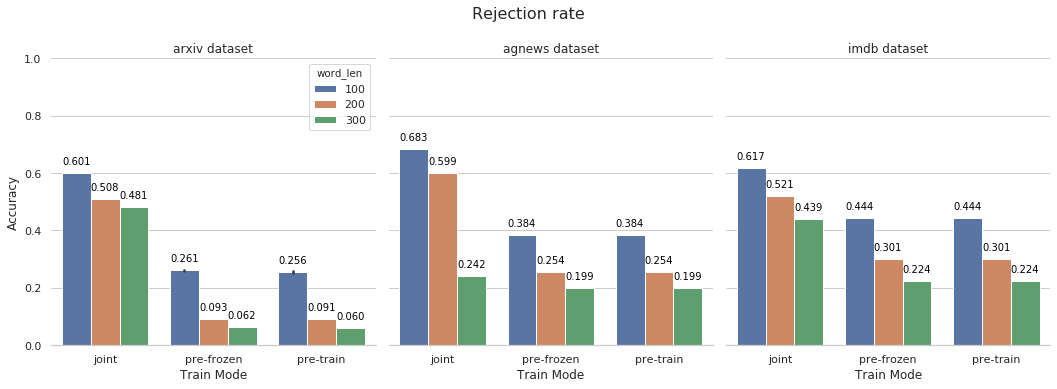

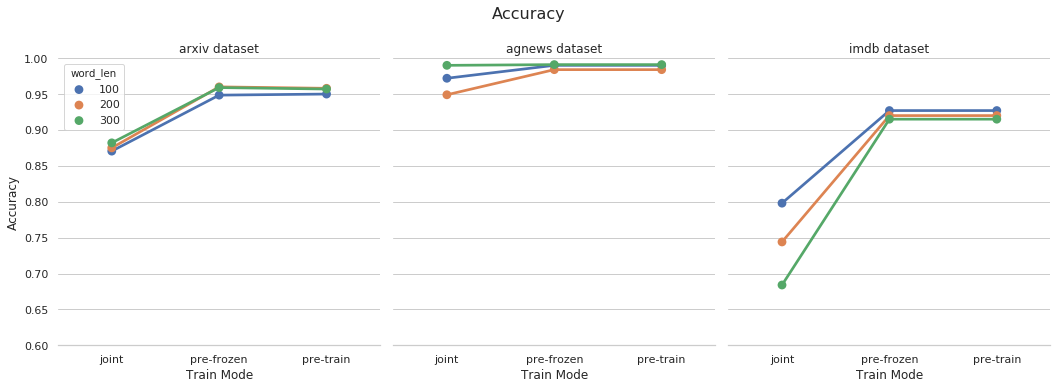

In [413]:

sns.set(style="whitegrid")

g = sns.catplot(x="train_mode", y="rejection_rate",
                 hue="word_len", col="dataset",
                 data=df, kind="bar",
                 height=5.5, aspect=.9, legend_out=False)

(g.set_axis_labels("Train Mode", "Accuracy")
.set_xticklabels(["joint", "pre-frozen", "pre-train"])
.set_titles("{col_name} {col_var}")
.set(ylim=(0, 1))
.despine(left=True)
.fig.suptitle('Rejection rate', fontsize=16)) 

plt.subplots_adjust(top=0.85)


for i in np.arange(3):
    ax1 = g.facet_axis(0,i)
    for p in ax1.patches:
        if str(p.get_height()) != 'nan':
            ax1.text(p.get_x(), 
                         p.get_height() + .03,
                         '{0:.3f}'.format(p.get_height()), 
                         color='black', 
                         rotation='horizontal', 
                         size='small')

g = sns.catplot(x="train_mode", y="accuracy",
                 hue="word_len", col="dataset",
                 data=df, kind="point",
                 height=5.5, aspect=.9, legend_out=False)

acc_ylim=(0.60,1)

(g.set_axis_labels("Train Mode", "Accuracy")
.set_xticklabels(["joint", "pre-frozen", "pre-train"])
.set_titles("{col_name} {col_var}")
.set(ylim=acc_ylim)
.despine(left=True)
.fig.suptitle('Accuracy', fontsize=16))  

plt.subplots_adjust(top=0.85)



/home/anneke/.local/lib/python3.6/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  del sys.path[0]


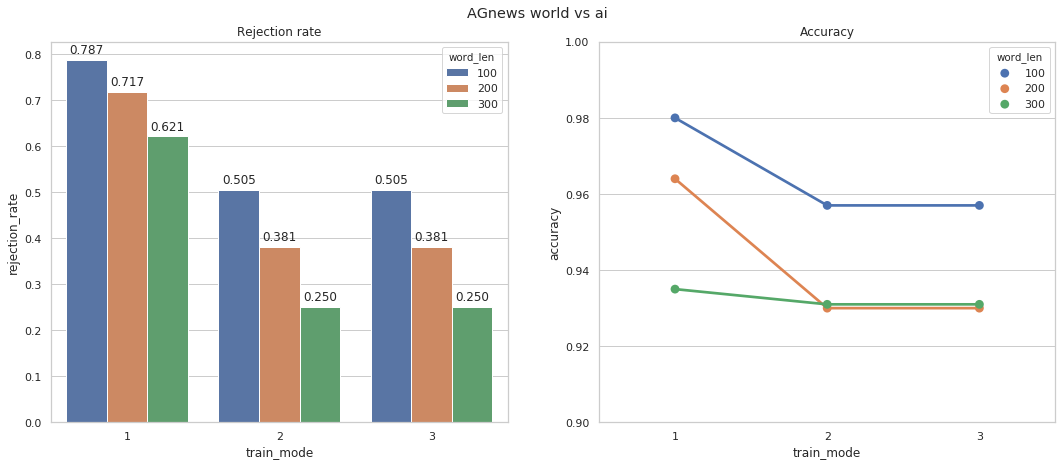

In [398]:
plt.figure(figsize=(18,7))
plt.suptitle('AGnews world vs ai', y=.95)

sub = plt.subplot(1, 2, 1)
sub.set_title('Rejection rate')
ax = sns.barplot(x="train_mode", y="rejection_rate",
                 hue="word_len", data=df)
# ax.set_xticklabels(rotation=90, labels=l_df['categories'])
# ax.set_xlim((0.80,1))
for p in ax.patches:
    ax.annotate('{:.3f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

    sub = plt.subplot(1, 2, 2)
sub.set_title('Accuracy')
ax = sns.pointplot(x="train_mode", y="accuracy",
                 hue="word_len", data=df)
# ax.set_xticklabels(rotation=90, labels=l_df['categories'])
ax.set_ylim((0.90,1))
for p in ax.patches:
    ax.annotate('{:.3f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

## Continuous training

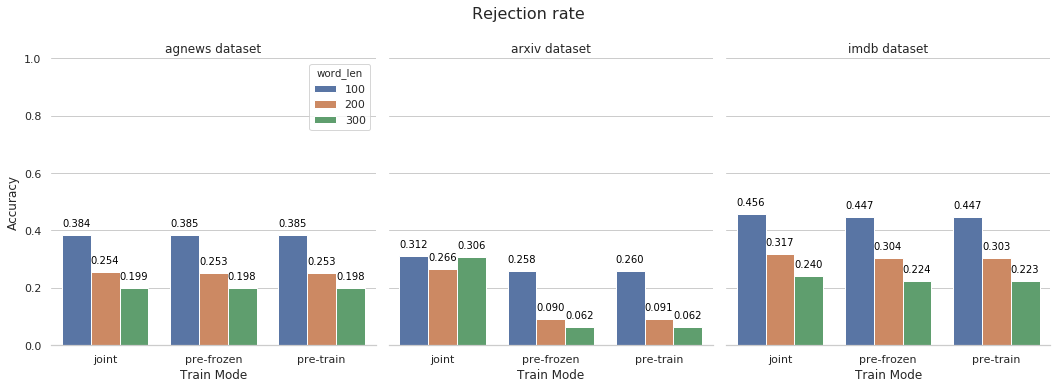

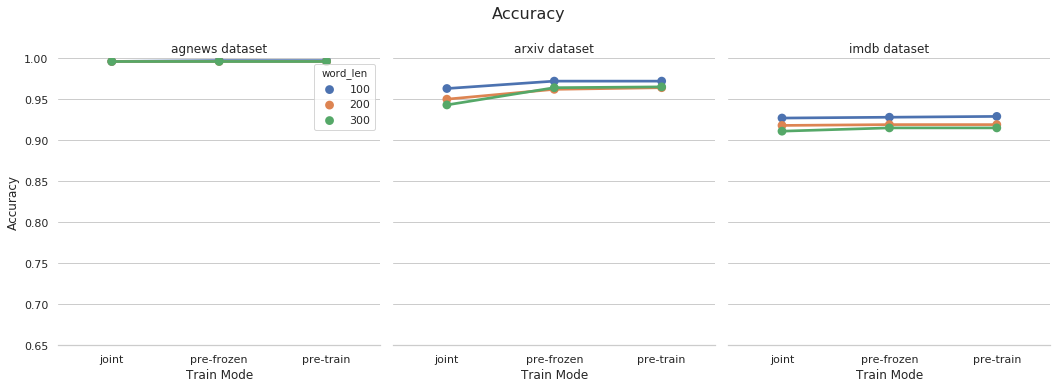

In [13]:

sns.set(style="whitegrid")
g = sns.catplot(x="train_mode", y="rejection_rate",
                 hue="word_len", col="dataset",
                 data=adf, kind="bar",
                 height=5.5, aspect=.9, legend_out=False)

(g.set_axis_labels("Train Mode", "Accuracy")
.set_xticklabels(["joint", "pre-frozen", "pre-train"])
.set_titles("{col_name} {col_var}")
.set(ylim=(0, 1))
.despine(left=True)
.fig.suptitle('Rejection rate', fontsize=16)) 

plt.subplots_adjust(top=0.85)


for i in np.arange(3):
    ax1 = g.facet_axis(0,i)
    for p in ax1.patches:
        if str(p.get_height()) != 'nan':
            ax1.text(p.get_x(), 
                         p.get_height() + .03,
                         '{0:.3f}'.format(p.get_height()), 
                         color='black', 
                         rotation='horizontal', 
                         size='small')

g = sns.catplot(x="train_mode", y="accuracy",
                 hue="word_len", col="dataset",
                 data=adf, kind="point",
                 height=5.5, aspect=.9, legend_out=False)

acc_ylim=(0.65,1)

(g.set_axis_labels("Train Mode", "Accuracy")
.set_xticklabels(["joint", "pre-frozen", "pre-train"])
.set_titles("{col_name} {col_var}")
.set(ylim=acc_ylim)
.despine(left=True)
.fig.suptitle('Accuracy', fontsize=16))  

plt.subplots_adjust(top=0.85)



/home/anneke/.local/lib/python3.6/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  del sys.path[0]


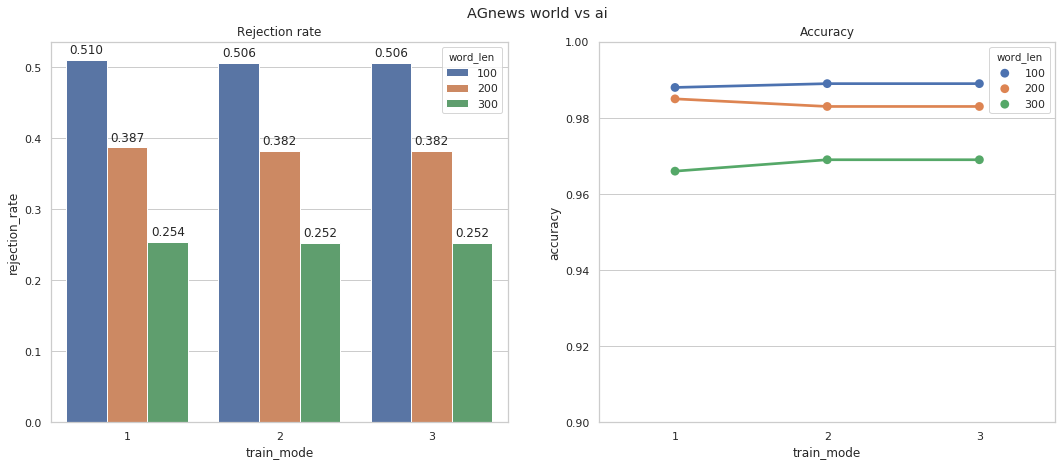

In [399]:
plt.figure(figsize=(18,7))
plt.suptitle('AGnews world vs ai', y=.95)

sub = plt.subplot(1, 2, 1)
sub.set_title('Rejection rate')
ax = sns.barplot(x="train_mode", y="rejection_rate",
                 hue="word_len", data=adf)
# ax.set_xticklabels(rotation=90, labels=l_df['categories'])
# ax.set_xlim((0.80,1))
for p in ax.patches:
    ax.annotate('{:.3f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

    sub = plt.subplot(1, 2, 2)
sub.set_title('Accuracy')
ax = sns.pointplot(x="train_mode", y="accuracy",
                 hue="word_len", data=adf)
# ax.set_xticklabels(rotation=90, labels=l_df['categories'])
ax.set_ylim((0.90,1))
for p in ax.patches:
    ax.annotate('{:.3f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

## Baseline

In [332]:
b_dir = glob.glob1(PATH, 'base-agnews-*')
dat = defaultdict(list)

In [333]:
b_dir

['base-agnews-300-19-09-04_11:10:41',
 'base-agnews-200-19-09-04_11:10:41',
 'base-agnews-200-19-08-28_18:32:29',
 'base-agnews-300-19-08-28_18:32:29',
 'base-agnews-100-19-09-04_11:10:41',
 'base-agnews-100-19-08-28_18:32:29']

In [334]:
for b in b_dir:
    conf = glob.glob1(os.path.join(PATH, b), "CONF*")
    
    if conf:
        with open(os.path.join(PATH, '{}/CONFIG'.format(b))) as j:
            config = json.load(j)
            
            dat['dataset'].append(config['args']['dataset'])
            dat['word_len'].append(config['args']['word_len'])
            dat['start_time'].append(config['start_time'])
            dat['end_time'].append(config['end_time'])
            dat['total_keyword'].append(config['data_summary']['keyword']['total'])
            dat['x_train'].append(config['data_summary']['data']['train'])
            dat['x_test'].append(config['data_summary']['data']['test'])
            dat['LR_tr'].append(config['results']['LR']['train_acc'])
            dat['LR_te'].append(config['results']['LR']['test_acc'])
            dat['LR_keys_tr_acc_wo_keyword'].append(config['results']['LR_keys']['train']['accuracy'])
            dat['LR_keys_tr_acc'].append(config['results']['LR_keys']['train']['accuracy_with_reject'])
            dat['LR_keys_tr_rejection_rate'].append(config['results']['LR_keys']['train']['rejection_rate'])
            dat['LR_keys_tr_accepted'].append(config['results']['LR_keys']['train']['total_accept'])
            dat['LR_keys_tr_rejected'].append(config['results']['LR_keys']['train']['total_reject'])
            
            dat['LR_keys_te_acc_wo_keyword'].append(config['results']['LR_keys']['test']['accuracy'])
            dat['LR_keys_te_acc'].append(config['results']['LR_keys']['test']['accuracy_with_reject'])
            dat['LR_keys_te_rejection_rate'].append(config['results']['LR_keys']['test']['rejection_rate'])
            dat['LR_keys_te_accepted'].append(config['results']['LR_keys']['test']['total_accept'])
            dat['LR_keys_te_rejected'].append(config['results']['LR_keys']['test']['total_reject'])

In [335]:
d = pd.DataFrame(dat)

In [343]:
d.sort_values(by='end_time').keys()

Index(['dataset', 'word_len', 'start_time', 'end_time', 'total_keyword',
       'x_train', 'x_test', 'LR_tr', 'LR_te', 'LR_keys_tr_acc_wo_keyword',
       'LR_keys_tr_acc', 'LR_keys_tr_rejection_rate', 'LR_keys_tr_accepted',
       'LR_keys_tr_rejected', 'LR_keys_te_acc_wo_keyword', 'LR_keys_te_acc',
       'LR_keys_te_rejection_rate', 'LR_keys_te_accepted',
       'LR_keys_te_rejected'],
      dtype='object')

In [353]:
agnews_df = d.sort_values(by='end_time')[['dataset', 'word_len','total_keyword',
       'LR_te',
       'LR_keys_te_acc_wo_keyword', 'LR_keys_te_acc',
       'LR_keys_te_rejection_rate']]

In [359]:
agnews_df.iloc[3:]

,dataset,word_len,total_keyword,LR_te,LR_keys_te_acc_wo_keyword,LR_keys_te_acc,LR_keys_te_rejection_rate
4,agnews,100,79,0.945789,0.777368,0.983650,0.031733
1,agnews,200,150,0.945789,0.829737,0.976862,0.023717
0,agnews,300,216,0.945789,0.871579,0.965553,0.014950


In [172]:
results = defaultdict(list)
dataset_ = ['imdb', 'arxiv', 'agnews']
word = ['100', '200', '300']
p = ['acc', 'rrate']

def get_results(results, df, acc_, rrate_, model):
    results['model'].append(model) 
    
    if model in ['LR-L1', 'LR-KEYS']:
        for d_ in dataset_:
            for w_ in word:
                results['{}-{}-{}'.format(d_, w_, 'acc')].append(df.loc[(df['dataset']==d_) & (df['word_len']==w_)][acc_].to_numpy()[0])
                if rrate_ is None:
                    results['{}-{}-{}'.format(d_, w_, 'rrate')].append('-')
                else:
                    results['{}-{}-{}'.format(d_, w_, 'rrate')].append(df.loc[(df['dataset']==d_) & (df['word_len']==w_)][rrate_].to_numpy()[0])
    else:
        for d_ in dataset_:
            for w_ in word:
                results['{}-{}-{}'.format(d_, 
                                          w_, 
                                          'acc')].append(df.loc[(df['dataset']==d_) & (df['word_len']==w_) & (df['epochs']==1) & (df['train_mode']==model)][acc_].to_numpy()[0])
                results['{}-{}-{}'.format(d_, 
                                          w_, 
                                          'rrate')].append(df.loc[(df['dataset']==d_) & (df['word_len']==w_) & (df['epochs']==1) & (df['train_mode']==model)][rrate_].to_numpy()[0])
    return results

results = get_results(results, d, 'LR_te', None, 'LR-L1')
results = get_results(results, d, 'LR_keys_te_acc', 'LR_keys_te_rejection_rate', 'LR-KEYS')
results = get_results(results, pdf, 'accuracy', 'rejection_rate', 1)
results = get_results(results, pdf, 'accuracy', 'rejection_rate', 2)
results = get_results(results, pdf, 'accuracy', 'rejection_rate', 3)

In [173]:
results = pd.DataFrame(results)

In [174]:
results.to_csv('./results.csv')

In [176]:
results

,model,imdb-100-acc,imdb-100-rrate,imdb-200-acc,imdb-200-rrate,imdb-300-acc,imdb-300-rrate,arxiv-100-acc,arxiv-100-rrate,arxiv-200-acc,arxiv-200-rrate,arxiv-300-acc,arxiv-300-rrate,agnews-100-acc,agnews-100-rrate,agnews-200-acc,agnews-200-rrate,agnews-300-acc,agnews-300-rrate
0,LR-L1,0.867920,-,0.867920,-,0.86792,-,0.958377,-,0.958377,-,0.958377,-,0.979737,-,0.979737,-,0.979737,-
1,LR-KEYS,0.850865,0.3874,0.845025,0.2422,0.84875,0.16456,0.962764,0.115584,0.958480,0.0356577,0.957919,0.0217644,0.992800,0.0239833,0.988846,0.0155167,0.986403,0.01185
2,1,0.798000,0.617,0.744000,0.521,0.68400,0.439,0.870000,0.601,0.875000,0.508,0.882000,0.481,0.972000,0.683,0.949000,0.599,0.990000,0.242
3,2,0.927000,0.444,0.920000,0.301,0.91500,0.224,0.946000,0.259,0.960000,0.093,0.959000,0.062,0.990000,0.384,0.984000,0.254,0.991000,0.199
4,3,0.927000,0.444,0.920000,0.301,0.91500,0.224,0.951000,0.259,0.958000,0.091,0.957000,0.06,0.990000,0.384,0.984000,0.254,0.991000,0.199


(0.8, 1)

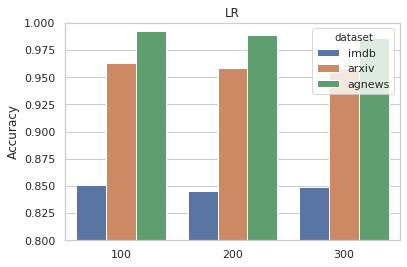

In [102]:
plt.title('LR')

ax = sns.barplot(x="word_len", y="LR_keys_te_acc", hue='dataset', data=d)
ax.set_ylabel('Accuracy')
ax.set_xlabel('')
plt.ylim((0.8, 1))

Text(0.5, 0, '')

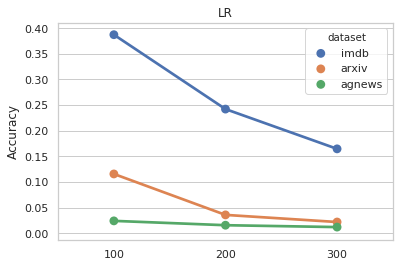

In [105]:
plt.title('LR')

ax = sns.pointplot(x="word_len", y="LR_keys_te_rejection_rate", hue='dataset', data=d)
ax.set_ylabel('Accuracy')
ax.set_xlabel('')

(0.8, 1)

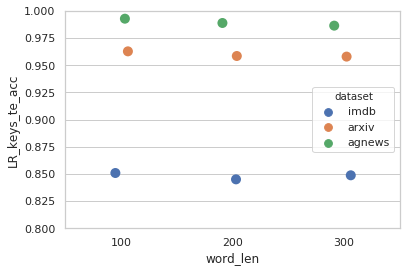

In [93]:
ax = sns.stripplot(x="word_len", y="LR_keys_te_acc", hue='dataset', data=d, size=10)

plt.ylim((0.8, 1))

## Logistic Regression

In [251]:
l_dir = sorted(glob.glob1(PATH, 'lr-arxiv-*'))
l_dict = defaultdict(list)

In [252]:
l_dir

['lr-arxiv-19-09-04_11:14:34', 'lr-arxiv-19-09-04_11:22:11']

In [253]:
for l in l_dir[1:]:
    conf = glob.glob1(os.path.join(PATH, l), "CONF*")
    
    if conf:
        with open(os.path.join(PATH, '{}/CONFIG'.format(l))) as j:
            config = json.load(j)
            
            for key in list(config['results'].keys()):
                l_dict['dataset'].append(config['args']['dataset'])
                l_dict['keys'].append(key)
                l_dict['categories'].append(config['results'][key]['categories'])
                l_dict['train_test_len'].append(config['results'][key]['train_test_len'])
                l_dict['train_acc'].append(config['results'][key]['train_acc'])
                l_dict['test_acc'].append(config['results'][key]['test_acc'])

In [255]:
l_df = pd.DataFrame(l_dict)

In [287]:
cs_arxiv_cat = {}

cs_arxiv_cat['cs.ai'] = 'Artificial Intelligence'
cs_arxiv_cat['cs.cl'] = 'Computation and Language'
cs_arxiv_cat['cs.cc'] = 'Computational Complexity'
cs_arxiv_cat['cs.ce'] = 'Computational Engineering, Finance, and Science'
cs_arxiv_cat['cs.cg'] = 'Computational Geometry'
cs_arxiv_cat['cs.gt'] = 'Computer Science and Game Theory'
cs_arxiv_cat['cs.cv'] = 'Computer Vision and Pattern Recognition'
cs_arxiv_cat['cs.cy'] = 'Computers and Society'
cs_arxiv_cat['cs.cr'] = 'Cryptography and Security'
cs_arxiv_cat['cs.ds'] = 'Data Structures and Algorithms'
cs_arxiv_cat['cs.db'] = 'Databases'
cs_arxiv_cat['cs.dl'] = 'Digital Libraries'
cs_arxiv_cat['cs.dm'] = 'Discrete Mathematics'
cs_arxiv_cat['cs.dc'] = 'Distributed, Parallel, and Cluster Computing'
cs_arxiv_cat['cs.et'] = 'Emerging Technologies'
cs_arxiv_cat['cs.fl'] = 'Formal Languages and Automata Theory'
cs_arxiv_cat['cs.et'] = 'Emerging Technologies'
cs_arxiv_cat['cs.gl'] = 'General Literature'
cs_arxiv_cat['cs.gr'] = 'Graphics'
cs_arxiv_cat['cs.ar'] = 'Hardware Architecture'
cs_arxiv_cat['cs.hc'] = 'Human-Computer Interaction'
cs_arxiv_cat['cs.ir'] = 'Information Retrieval'
cs_arxiv_cat['cs.it'] = 'Information Theory'
cs_arxiv_cat['cs.lo'] = 'Logic in Computer Science'
cs_arxiv_cat['cs.lg'] = 'Machine Learning'
cs_arxiv_cat['cs.ms'] = 'Mathematical Software'
cs_arxiv_cat['cs.ma'] = 'Multiagent Systems'
cs_arxiv_cat['cs.mm'] = 'Multimedia'
cs_arxiv_cat['cs.ni'] = 'Networking and Internet Architecture'
cs_arxiv_cat['cs.ne'] = 'Neural and Evolutionary Computing'
cs_arxiv_cat['cs.na'] = 'Numerical Analysis'
cs_arxiv_cat['cs.os'] = 'Operating Systems'
cs_arxiv_cat['cs.oh'] = 'Other Computer Science'
cs_arxiv_cat['cs.pf'] = 'Performance'
cs_arxiv_cat['cs.pl'] = 'Programming Languages'
cs_arxiv_cat['cs.ro'] = 'Robotics'
cs_arxiv_cat['cs.si'] = 'Social and Information Networks'
cs_arxiv_cat['cs.se'] = 'Software Engineering'
cs_arxiv_cat['cs.sd'] = 'Sound'
cs_arxiv_cat['cs.sc'] = 'Symbolic Computation'
cs_arxiv_cat['cs.sy'] = 'Systems and Control'

In [297]:
l_df.iloc[0]['keys'].split('\'')

def convert(data):
    cat = data.split('\'')
    
    return '({}, {})'.format(cs_arxiv_cat[cat[1]], cs_arxiv_cat[cat[3]])

In [294]:
l_df.iloc[0]['keys'].split('\'')

['(', 'cs.lg', ', ', 'cs.cv', ')']

In [319]:
l_df

,dataset,keys,categories,train_test_len,train_acc,test_acc
0,arxiv,"(Machine Learning, Computer Vision and Pattern...","(Machine Learning, Computer Vision and Pattern...","[36170, 18085]",0.955599,0.919934
1,arxiv,"(Machine Learning, Information Theory)","(Machine Learning, Information Theory)","[40502, 20251]",0.987482,0.959508
2,arxiv,"(Machine Learning, Artificial Intelligence)","(Machine Learning, Artificial Intelligence)","[28588, 14295]",0.909403,0.863938
3,arxiv,"(Machine Learning, Data Structures and Algorit...","(Machine Learning, Data Structures and Algorit...","[31036, 15518]",0.989979,0.959724
4,arxiv,"(Machine Learning, Computation and Language)","(Machine Learning, Computation and Language)","[28788, 14394]",0.986557,0.957482
5,arxiv,"(Machine Learning, Networking and Internet Arc...","(Machine Learning, Networking and Internet Arc...","[31234, 15617]",0.997119,0.980598
6,arxiv,"(Machine Learning, Cryptography and Security)","(Machine Learning, Cryptography and Security)","[29510, 14755]",0.995900,0.974314
7,arxiv,"(Machine Learning, Social and Information Netw...","(Machine Learning, Social and Information Netw...","[29638, 14819]",0.991700,0.965517
8,arxiv,"(Machine Learning, Distributed, Parallel, and ...","(Machine Learning, Distributed, Parallel, and ...","[28999, 14500]",0.994310,0.969448
9,arxiv,"(Computer Vision and Pattern Recognition, Info...","(Computer Vision and Pattern Recognition, Info...","[37190, 18596]",0.995214,0.976500


In [301]:
l_df['categories'] = l_df['categories'].apply(convert)

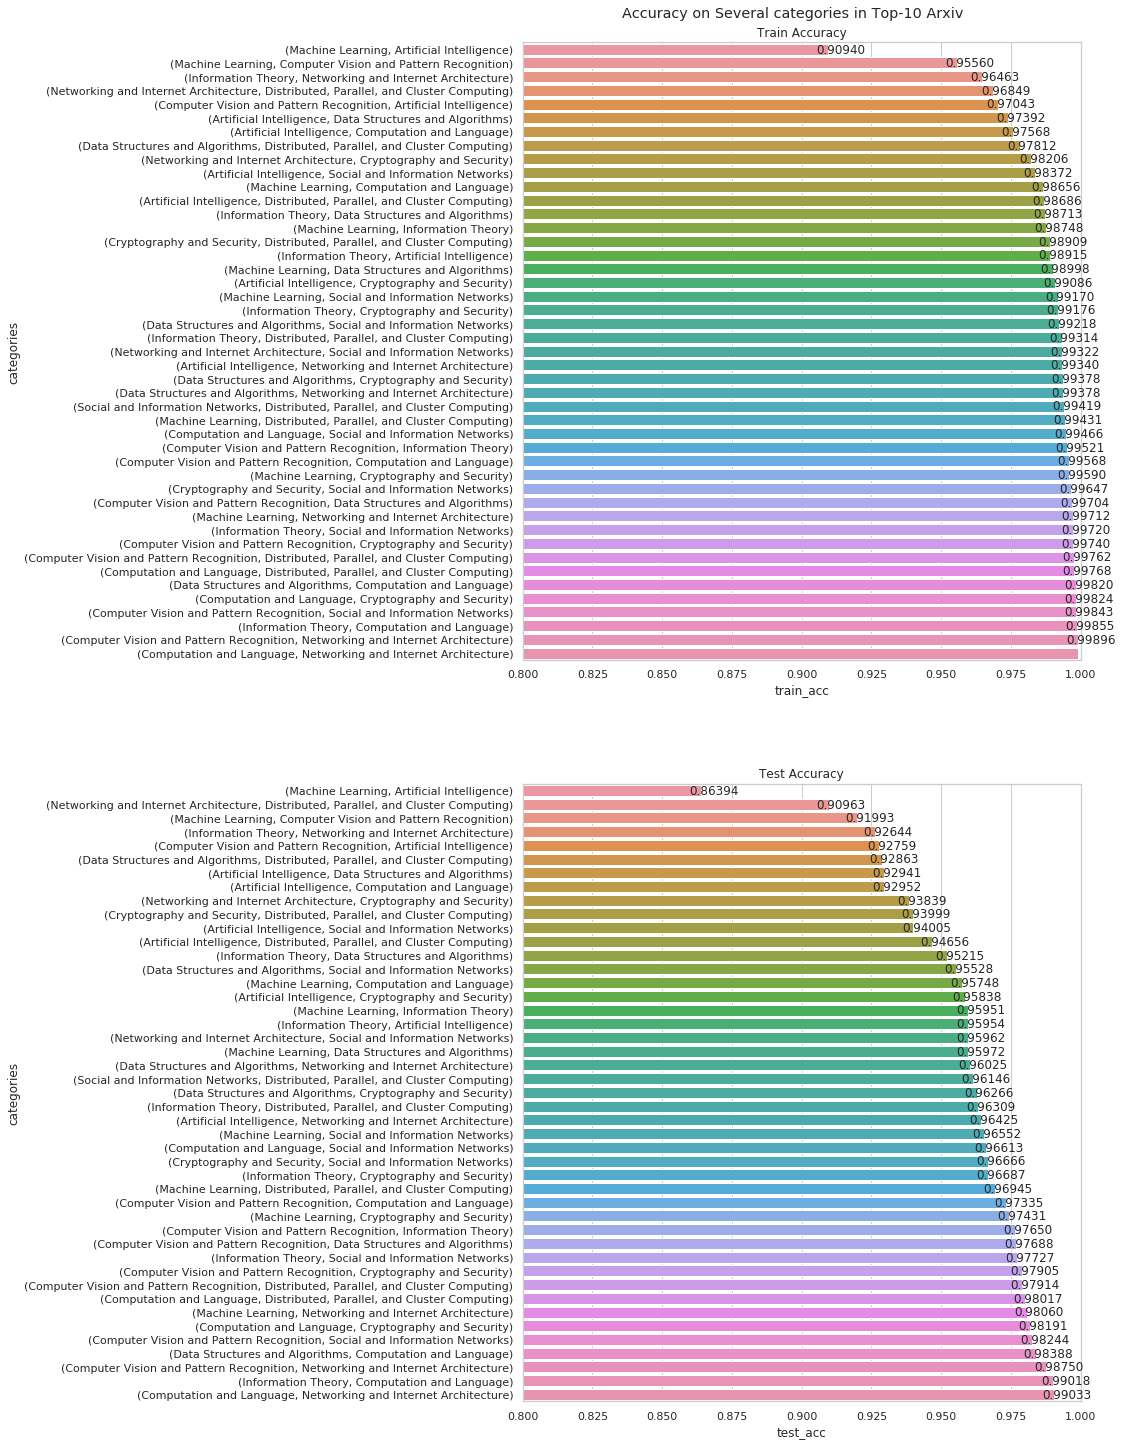

In [327]:
plt.figure(figsize=(10,25))
plt.suptitle('Accuracy on Several categories in Top-10 Arxiv', y=.9)

sub = plt.subplot(2, 1, 1)
sub.set_title('Train Accuracy')
ax = sns.barplot(x="train_acc", y="categories", data=l_df.sort_values(by=['train_acc']))
# ax.set_xticklabels(rotation=90, labels=l_df['categories'])
ax.set_xlim((0.80,1))
for p in ax.patches:
    ax.annotate('{:.5f}'.format(p.get_width()), (p.get_width()+0.001, p.get_y() + p.get_height()/2.), ha = 'center', va = 'center', xytext = (10, 0), textcoords = 'offset points')
    
sub = plt.subplot(2, 1, 2)
sub.set_title('Test Accuracy')
ax = sns.barplot(x="test_acc", y="categories", data=l_df.sort_values(by=['test_acc']))
# ax.set_xticklabels(rotation=90, labels=l_df['categories'])
ax.set_xlim((0.80,1))
for p in ax.patches:
    ax.annotate('{:.5f}'.format(p.get_width()), (p.get_width()+0.001, p.get_y() + p.get_height()/2.), ha = 'center', va = 'center', xytext = (10, 0), textcoords = 'offset points')